![netflix_header](netflix_header.png)


# Netflix Top 10: Analyzing Weekly Chart-Toppers

This dataset comprises Netflix's weekly top 10 lists for the most-watched TV shows and films worldwide. The data spans from June 28, 2021, to August 27, 2023.

This workspace is pre-loaded with two CSV files. 
- `netflix_top10.csv` contains columns such as `show_title`, `category`, `weekly_rank`, and several view metrics.
- `netflix_top10_country.csv` has information about a show or film's performance by country, contained in the columns `cumulative_weeks_in_top_10` and `weekly_rank`.

We've added some guiding questions for analyzing this exciting dataset! Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells. 

[Source: Netflix](https://www.netflix.com/tudum/top10/united-states?week=2023-08-27) 

## Explore this dataset

To get you started with your analysis...
1. Combine the different categories of top 10 lists in a single weekly top 10 list spanning all categories
2. Are there consistent trends or patterns in the content format (tv, film) that make it to the top 10 over different weeks or months?
3. Explore your country's top 10 trends. Are there unique preferences or regional factors that set your country's list apart from others?
4. Visualize popularity ranking over time through time series plots

### 🔍 **Scenario: Understanding the Impact of Content Duration on Netflix's Top 10 Lists**

This scenario helps you develop an end-to-end project for your portfolio.

Background: As a data scientist at Netflix, you're tasked with exploring the dataset containing weekly top 10 lists of the most-watched TV shows and films. For example, you're tasked to find out what the relationship is between duration and ranking over time. Answering this question can inform content creators and strategists on how to optimize their offerings for the platform.

**Objective**: Determine if there's a correlation between content duration and its likelihood of making it to the top 10 lists.

You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

In [8]:
import pandas as pd 

global_top_10 = pd.read_csv("netflix_top10.csv", index_col=0)
print(global_top_10.shape)
print(global_top_10.head())

countries_top_10 = pd.read_csv("netflix_top10_country.csv", index_col=0)
print(countries_top_10.shape)
print(countries_top_10.head())


(4520, 10)
                   category  weekly_rank  \
week                                       
2023-08-27  Films (English)            1   
2023-08-27  Films (English)            2   
2023-08-27  Films (English)            3   
2023-08-27  Films (English)            4   
2023-08-27  Films (English)            5   

                                          show_title season_title  \
week                                                                
2023-08-27                           The Monkey King          NaN   
2023-08-27                            Heart of Stone          NaN   
2023-08-27  You Are So Not Invited to My Bat Mitzvah          NaN   
2023-08-27                              Street Kings          NaN   
2023-08-27                             The Boss Baby          NaN   

            weekly_hours_viewed  runtime  weekly_views  \
week                                                     
2023-08-27             23200000   1.6167    14400000.0   
2023-08-27            

In [9]:
import pandas as pd

# Load the datasets
global_top_10 = pd.read_csv('netflix_top10.csv')
countries_top_10 = pd.read_csv('netflix_top10_country.csv')

# Display the first few rows of each dataset
print('Global Top 10 Dataset:')
print(global_top_10.head())

print('\nCountries Top 10 Dataset:')
print(countries_top_10.head())


Global Top 10 Dataset:
         week         category  weekly_rank  \
0  2023-08-27  Films (English)            1   
1  2023-08-27  Films (English)            2   
2  2023-08-27  Films (English)            3   
3  2023-08-27  Films (English)            4   
4  2023-08-27  Films (English)            5   

                                 show_title season_title  weekly_hours_viewed  \
0                           The Monkey King          NaN             23200000   
1                            Heart of Stone          NaN             28500000   
2  You Are So Not Invited to My Bat Mitzvah          NaN             21300000   
3                              Street Kings          NaN             10300000   
4                             The Boss Baby          NaN              9000000   

   runtime  weekly_views  cumulative_weeks_in_top_10  is_staggered_launch  \
0   1.6167    14400000.0                           2                False   
1   2.1000    13600000.0                           3 

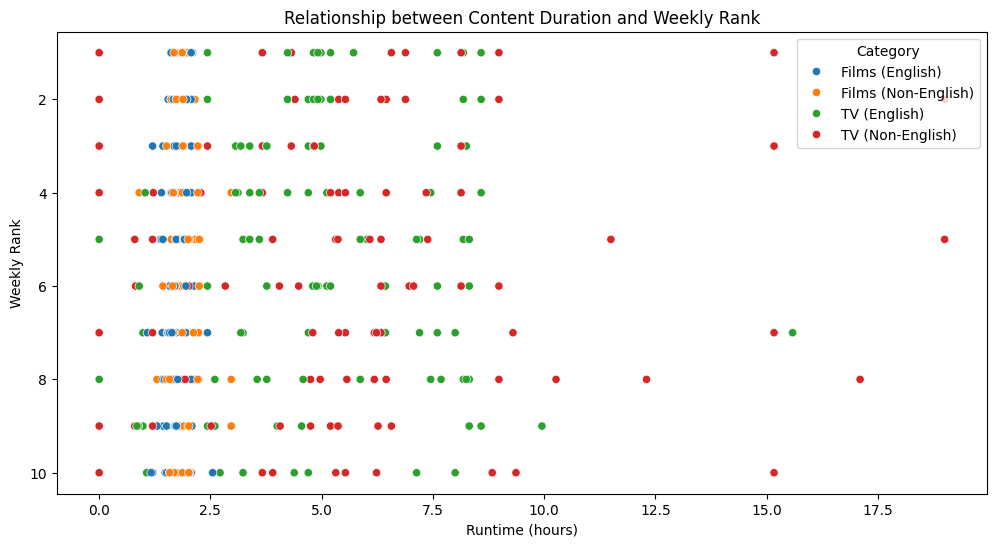

Correlation between runtime and weekly rank:
              runtime  weekly_rank
runtime      1.000000    -0.032107
weekly_rank -0.032107     1.000000


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV files
countries_top_10 = pd.read_csv('netflix_top10.csv')

# Check if 'runtime' column exists in the DataFrame
if 'runtime' not in countries_top_10.columns:
    raise ValueError("The 'runtime' column is missing from the DataFrame.")

# Plot the relationship between runtime and weekly rank
plt.figure(figsize=(12, 6))
sns.scatterplot(data=countries_top_10, x='runtime', y='weekly_rank', hue='category')
plt.title('Relationship between Content Duration and Weekly Rank')
plt.xlabel('Runtime (hours)')
plt.ylabel('Weekly Rank')
plt.gca().invert_yaxis()  # Invert y-axis to show rank 1 at the top
plt.legend(title='Category')
plt.show()

# Calculate correlation
correlation = countries_top_10[['runtime', 'weekly_rank']].corr()
print('Correlation between runtime and weekly rank:')
print(correlation)
